In [1]:
import datetime
import time
import requests
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
from config import get_from_config, save_to_config
from acnet_reader.acnet_reader import fetch_data, get_interpolated_df, fetch_interpolated_data
import fur.path_assistant as path_assistant
import lattice.lattice as lattice
plt.rcParams['figure.figsize'] = [20, 7.5]
plt.rcParams.update({'font.size': 16,'legend.fontsize':16})
shift_03_10_2020 = path_assistant.PathAssistant('shift_03_10_2020')
waveforms_dir = shift_03_10_2020.get_waveforms_dir()
results_dir = shift_03_10_2020.get_results_dir()
acnet_data_dir = shift_03_10_2020.get_acnet_data_dir()
bpm_data_dir = shift_03_10_2020.get_bpm_data_dir()
bpm_files_df = shift_03_10_2020.get_bpm_files_df()
acnet_data_df = shift_03_10_2020.get_acnet_data_df("all_acnet_data_03_10_2020.csv")
fluctuations_df = shift_03_10_2020.get_fluctuations_df("res_df_nd_filters_data_03_10_2020.csv")
lattice_file = shift_03_10_2020.get_6dsim_dir().fi("IOTA_1NL_100MeV_v8.6.1.3.6ds_data.txt")

In [2]:
lattice_df = lattice.read_lattice_file(lattice_file)

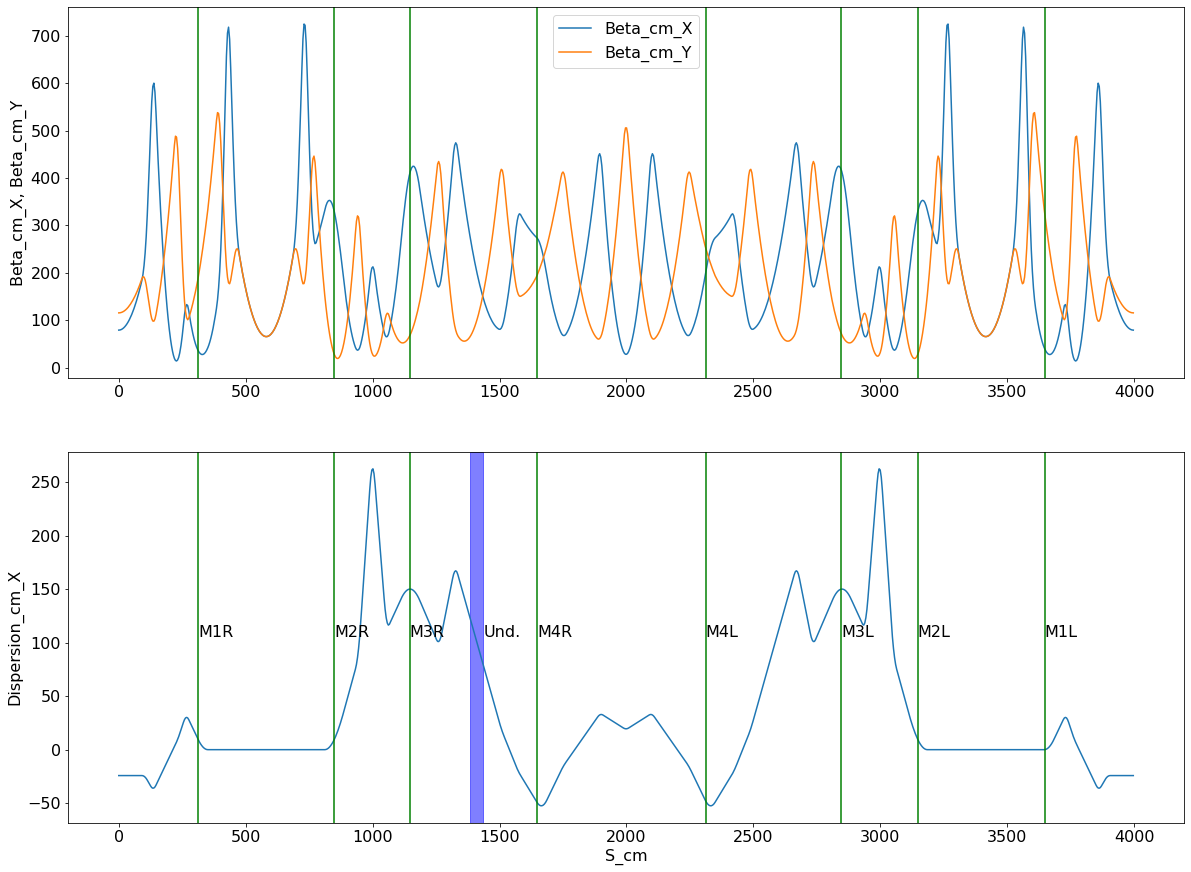

In [3]:
lattice.plot_lattice(lattice_df)

In [4]:
shift_03_10_2020 = path_assistant.PathAssistant('shift_03_10_2020')
fluctuations_df = shift_03_10_2020.get_fluctuations_df("res_df_nd_filters_data_plus_acnet_03_10_2020.csv")

In [5]:
cameras_df = lattice.get_cameras_df(
    lattice_df,
    fluctuations_df.loc[:,lattice.acnet_devices_X].mean().values,
    fluctuations_df.loc[:,lattice.acnet_devices_Y].mean().values)
cameras_df


,Name,S_cm,Dispersion_cm_X,Beta_cm_X,Beta_cm_Y,Alpha_X,Alpha_Y,ACNET_device_X,ACNET_device_Y,Measured_sigma_um_X,Measured_sigma_um_Y
0,M1R,312.390772,9.722311,36.225434,188.171560,0.508217,-1.542989,N:ITC1RSH,N:ITC1RSV,482.364166,118.631072
1,M2R,847.531424,8.867605,332.373347,30.217598,1.107789,0.754704,N:ITC2RSH,N:ITC2RSV,1455.804900,82.437101
2,M3R,1146.760637,149.997534,410.057483,67.853144,-1.054932,-0.549460,N:ITC3RSH,N:ITC3RSV,1681.260265,98.769470
3,M4R,1648.557835,-49.483645,272.884031,195.416364,0.304775,-0.662569,N:ITC4RSH,N:ITC4RSV,732.771000,105.998900
4,M4L,2312.048374,-47.892921,200.362880,252.677345,-1.549672,0.927709,N:ITC4LSH,N:ITC4LSV,1104.937873,166.789298
5,M3L,2846.836442,149.983921,415.934446,71.284732,0.832799,0.607294,N:ITC3LSH,N:ITC3LSV,1686.856890,76.189315
6,M2L,3146.927526,9.901680,327.556295,27.031383,-1.229046,-0.642134,N:ITC2LSH,N:ITC2LSV,1594.700080,73.051287
7,M1L,3646.794132,0.035522,40.729689,328.847554,0.616955,2.215497,N:ITC1LSH,N:ITC1LSV,515.091194,141.268839


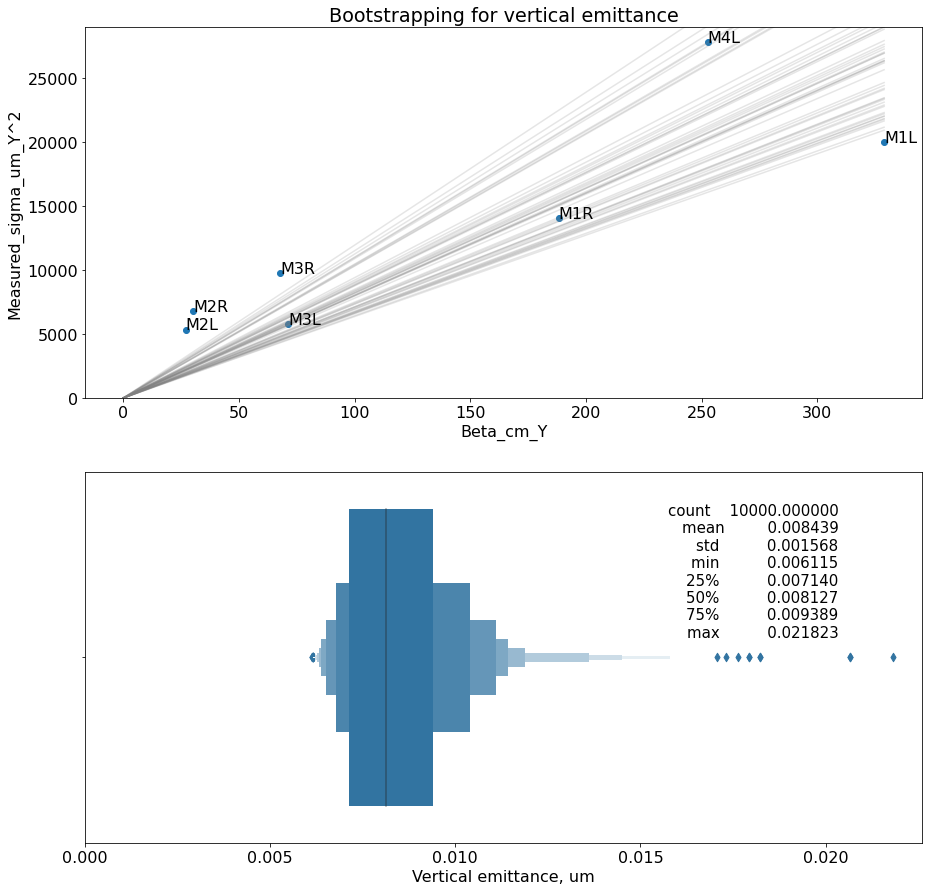

In [6]:
ey_um_description = lattice.get_ey_um_least_squares(cameras_df, show_plot=True)

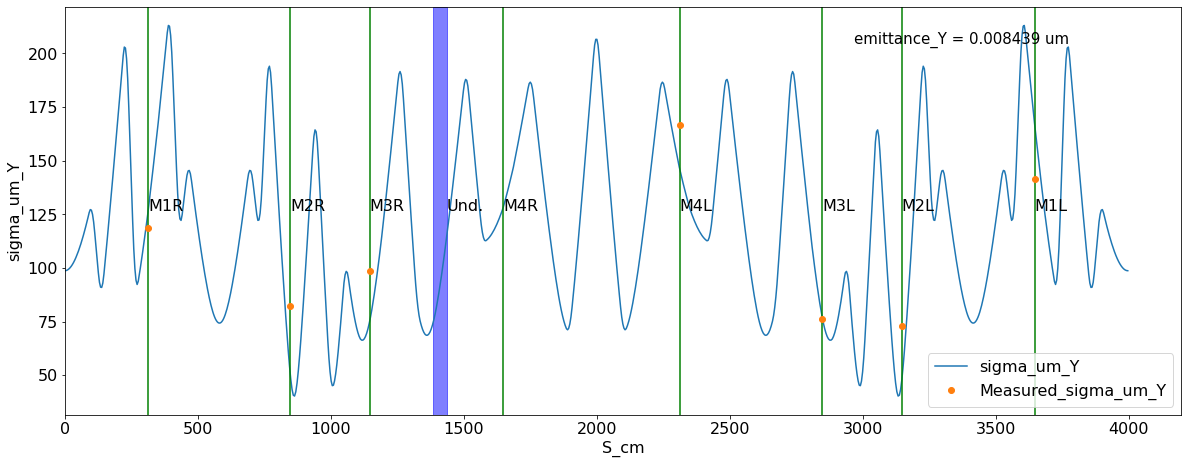

In [7]:
lattice.show_sigma_fit(lattice_df, cameras_df, 'Y', ey_um_description["mean"])

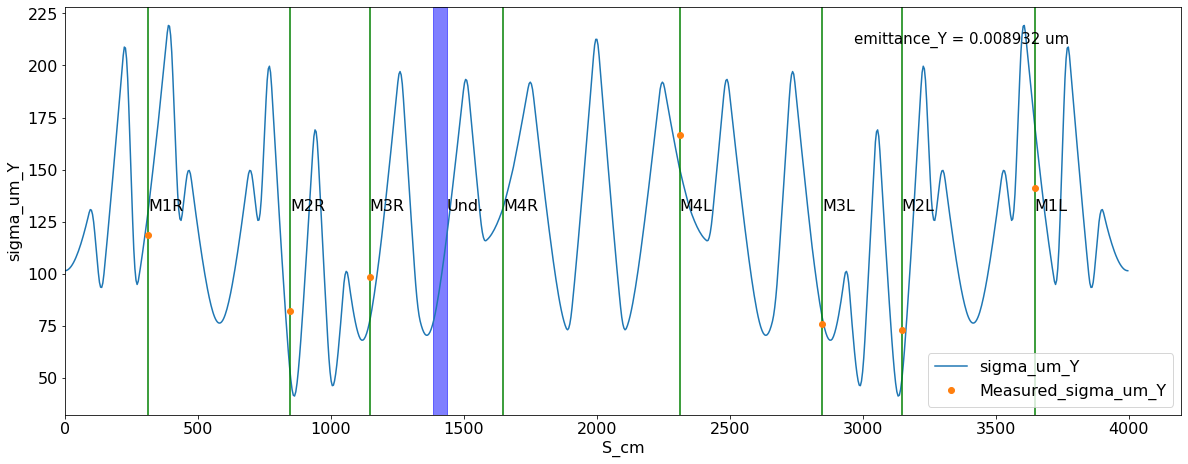

In [8]:
ey_um, ey_err = lattice.get_e_um_Y_scipy_curve_fit(cameras_df)
lattice.show_sigma_fit(lattice_df, cameras_df, 'Y', ey_um)

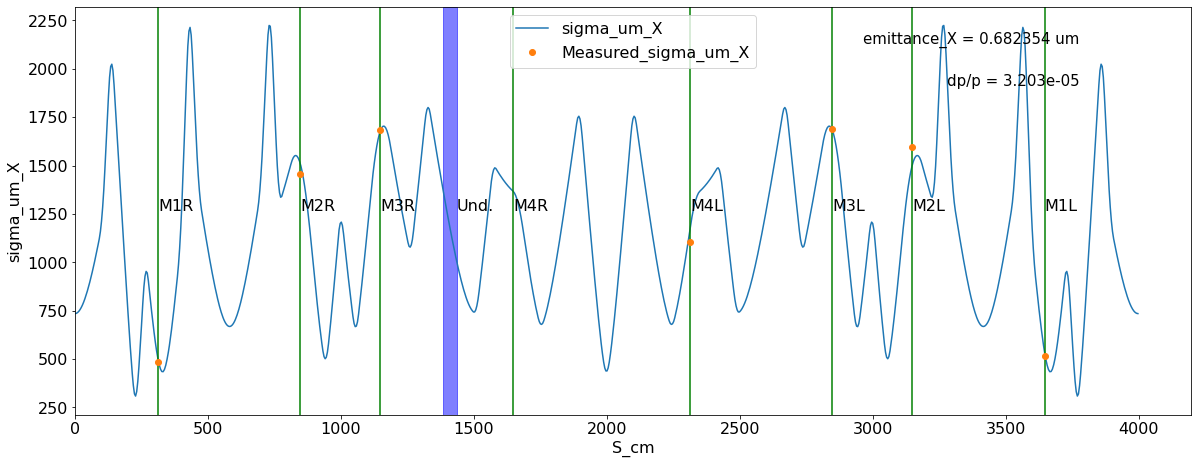

In [9]:
popt, perr = lattice.get_e_um_X_scipy_curve_fit(cameras_df)
ex_um, dpp = popt
ex_err, dpp_err = perr
lattice.show_sigma_fit(lattice_df, cameras_df, 'X', ex_um, dpp=dpp)

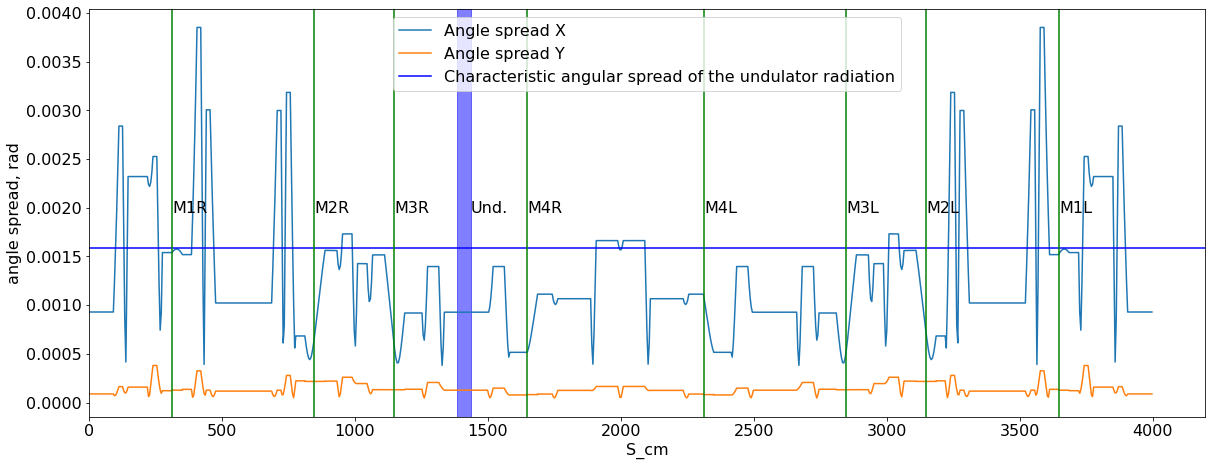

In [10]:
lattice.show_angle_spread_X_Y(lattice_df, ex_um, ey_um)

In [11]:
lattice.get_undulator_df(lattice_df, ex_um, ey_um, dpp)

,S_cm,Dispersion_cm_X,Beta_cm_X,Beta_cm_Y,Alpha_X,Alpha_Y,Sigma_um_X,Sigma_um_Y,Angle_spread_rad_X,Angle_spread_rad_Y
Start,1383.90,122.936779,276.365925,65.280075,1.574657,-0.412112,1373.806169,76.358295,0.000927,0.000127
Middle,1409.65,101.204607,203.630155,98.414182,1.250287,-0.874287,1179.206725,93.755066,0.000927,0.000127
End,1435.40,79.472435,147.585260,155.330115,0.925917,-1.336463,1003.843267,117.786016,0.000927,0.000127
